In [19]:
import pandas as pd  # panda's nickname is pd
import numpy as np  # numpy as np
import os
from pandas import DataFrame, Series, Categorical
os.chdir("C:\\Users\\Otis\\Documents\\Northwestern\\MSDS422\\Module 1")

### Exploratory Data Analysis
First let's get to know what kind of data we have. 

In [3]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now let's see how populated the data is. Looks like the Cabin column isn't too populated to the point it probably isn't worth filling in nan values. 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In the header above it seemed like there was some variation on Ticket. So I decided to see more details around that column to see what the uniqueness is. It appears there is a lot of variability in this column. 

In [6]:
train["Ticket"].value_counts()

CA. 2343              7
347082                7
1601                  7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
113760                4
113781                4
2666                  4
19950                 4
4133                  4
347077                4
PC 17757              4
LINE                  4
W./C. 6608            4
349909                4
17421                 4
PC 17572              3
C.A. 31921            3
371110                3
35273                 3
248727                3
PC 17582              3
PC 17760              3
347742                3
13502                 3
345773                3
SC/Paris 2123         3
                     ..
Fa 265302             1
2648                  1
2689                  1
111320                1
27042                 1
345572                1
349244                1
A/5 21173             1
A/4. 20589            1
14312                 1
PC 17754        

Next we will use the describe function to get a sense of our data. Obviously the metrics on the passenger id doesn't make sense but it can give you a good sense of what you're working with. As you can many people on the ship were younger, lower class, and most did not survive.

In [59]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Next let's make histograms of all of our numeric data so we can get an even clearer sense of how it is distributed. As we can see passengers were younger, fares were cheap, and most had no other family on the ship.

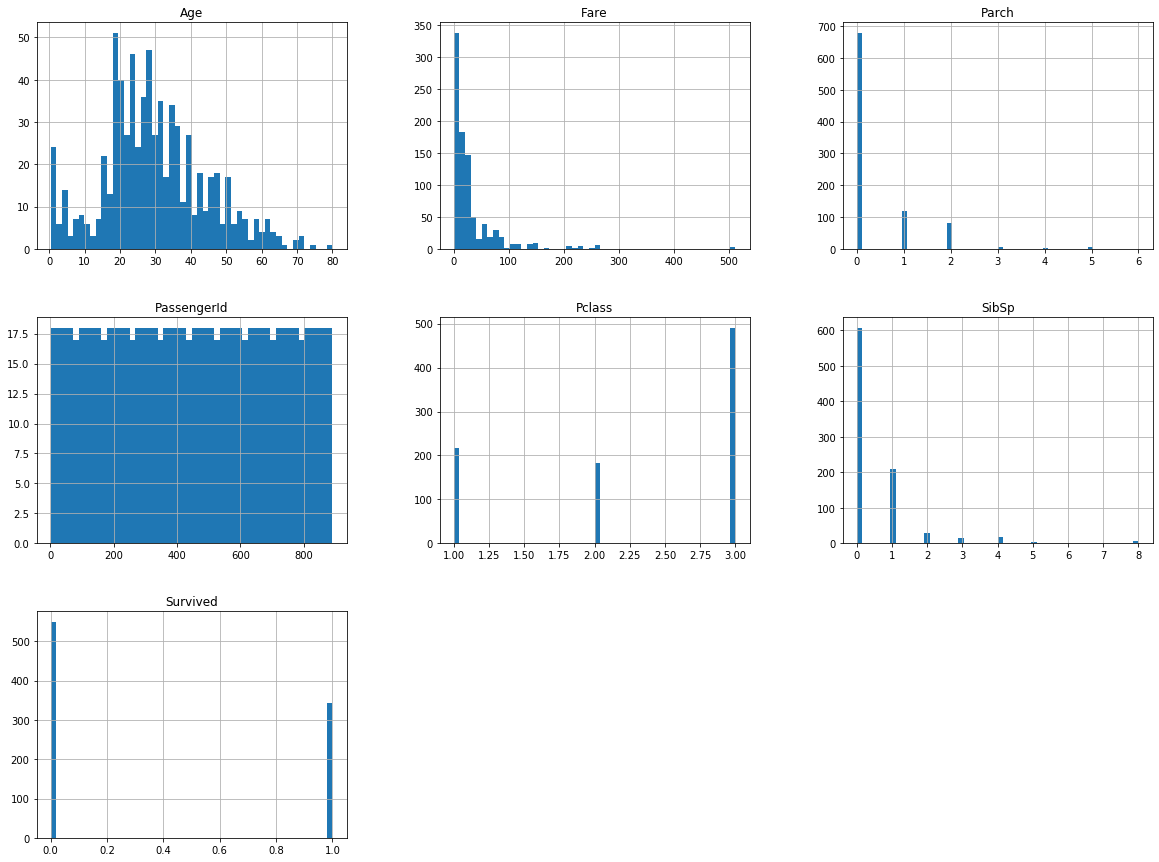

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

Next let's convert Sex and Embarked into numeric values so we can include them in our correlation analysis. I had to fill nan for Embarked so it would convert to int. 

In [79]:
train['num_Sex'] = train['Sex']
train['num_Embarked'] = train['Embarked']
train.loc[train['Sex'] == 'male', 'num_Sex'] = 1
train.loc[train['Sex'] == 'female', 'num_Sex'] = 2
train.loc[train['Embarked'] == 'C', 'num_Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'num_Embarked'] = 2
train.loc[train['Embarked'] == 'S', 'num_Embarked'] = 3
train['num_Embarked'].fillna(0, inplace = True)

Now we run a correlatoin matrix. It looks like the the top three correlations were num_Sex, Pclass, and Fare

In [80]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived        1.000000
num_Sex         0.543351
Fare            0.257307
Parch           0.081629
PassengerId    -0.005007
SibSp          -0.035322
Age            -0.077221
num_Embarked   -0.176509
Pclass         -0.338481
Name: Survived, dtype: float64

Next let's look at a scatter matrix for the top four correlated to Survived columns. Honestly I didn't learn much from this but figured it was worth sharing!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D104734A8>,
      dtype=object)

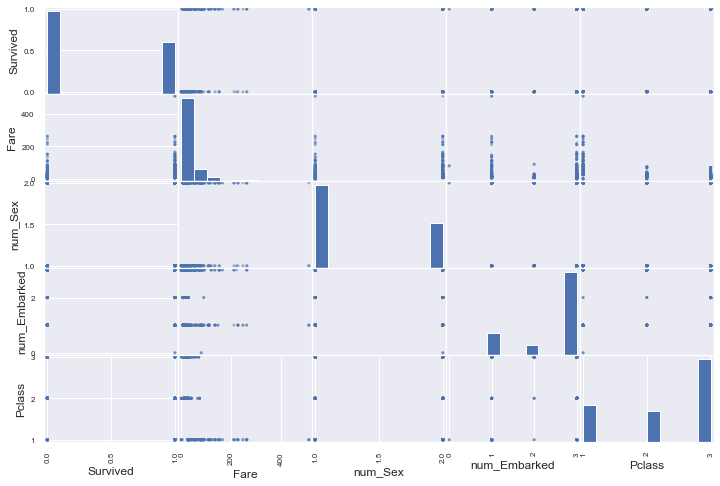

In [82]:
%matplotlib inline 
from pandas.plotting import scatter_matrix
attributes = ["Survived", "Fare", "num_Sex","num_Embarked", "Pclass"]
scatter_matrix(train[attributes], figsize=(12, 8))


Next I decided to do a stacked bar chart to look at how survived from different classes. It was somewhat helpful to see that people in upper classes survived at a higher rate. However I decdied to use more bar graphs below because it was tough to see the difference in areas in the stacked bar chart format.

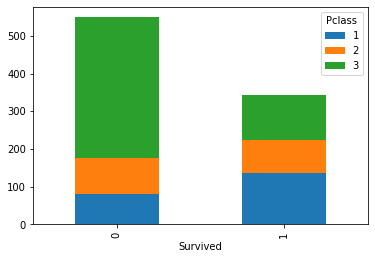

In [47]:
df_plot = train.groupby(['Pclass', 'Survived']).size().reset_index().pivot(columns='Pclass', index='Survived', values=0)
df_plot.plot(kind='bar', stacked=True)

The seaborn graphs were visually more nice and better than the stacked bar chart to see how three of the top four correlated attributes were related to survival. I did not include Fare because there were two many values to graph out in this format. As we can see females, upper class, and those who boarded in Cherbourg had a better chance of survival.

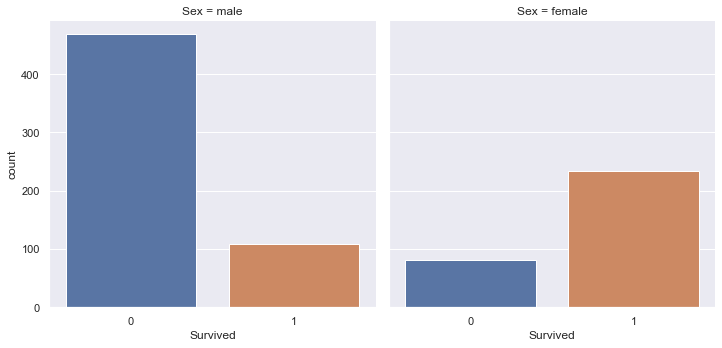

In [50]:
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()
sns.catplot(x='Survived', col='Sex', kind='count', data=train);

In [55]:
print(train[train.Sex == 'female'].Survived.sum()/train[train.Sex == 'female'].Survived.count())
print(train[train.Sex == 'male'].Survived.sum()/train[train.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


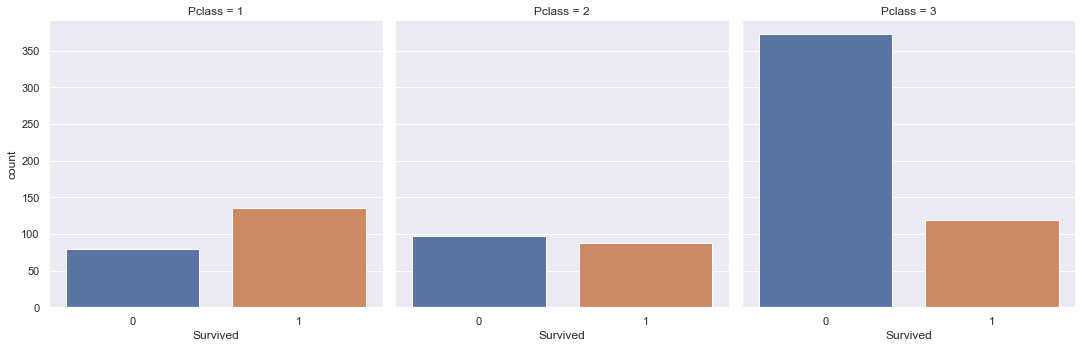

In [51]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=train);

In [58]:
print(train[train.Pclass == 1].Survived.sum()/train[train.Pclass == 1].Survived.count())
print(train[train.Pclass == 2].Survived.sum()/train[train.Pclass == 2].Survived.count())
print(train[train.Pclass == 3].Survived.sum()/train[train.Pclass == 3].Survived.count())

0.6296296296296297
0.47282608695652173
0.24236252545824846


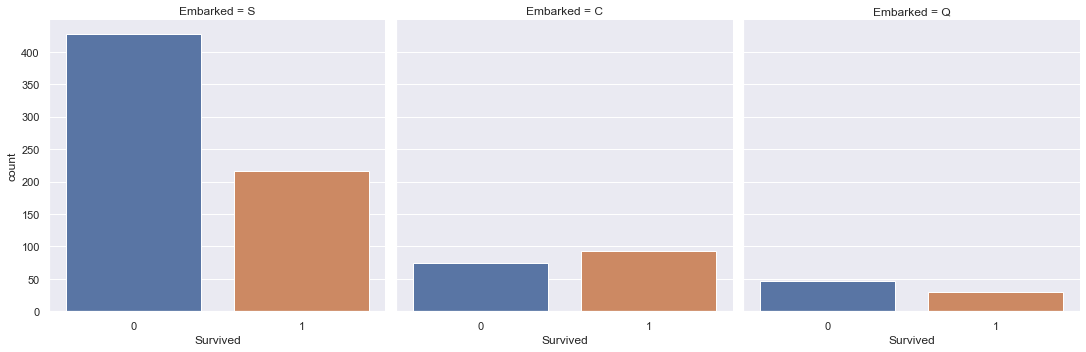

In [84]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train);